### 1st Code

In [15]:
# Python3 program to implement traveling salesman 
# problem using naive approach. 
from sys import maxsize 
from itertools import permutations


# implementation of traveling Salesman Problem 
def travellingSalesmanProblem(graph, s): 
    V=len(graph)
    # store all vertex apart from source vertex 
    vertex = [] 
    for i in range(V): 
        if i != s: 
            vertex.append(i) 

    # store minimum weight Hamiltonian Cycle 
    min_path = maxsize 
    next_permutation=permutations(vertex)
    for i in next_permutation:

        # store current Path weight(cost) 
        current_pathweight = 0

        # compute current path weight 
        k = s 
        for j in i: 
            current_pathweight += graph[k][j] 
            k = j 
        current_pathweight += graph[k][s] 

        # update minimum 
        min_path = min(min_path, current_pathweight) 
        
    return min_path 


# Driver Code 
if __name__ == "__main__": 

    # matrix representation of graph 
    graph = [[0, 10, 15, 20], [10, 0, 35, 25], 
            [15, 35, 0, 30], [20, 25, 30, 0]] 
    s = 0
    print(travellingSalesmanProblem(graph, s))


80


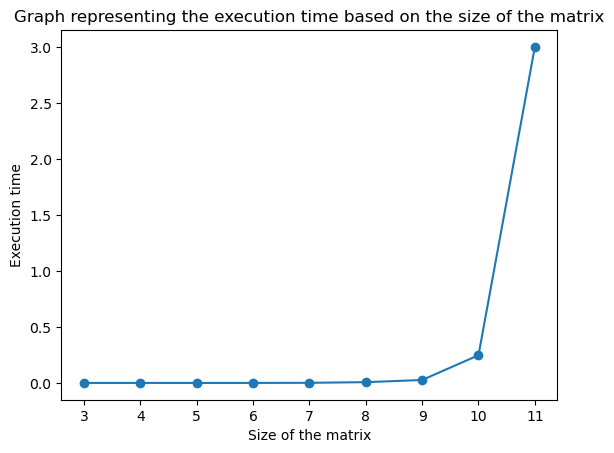

In [28]:
import numpy as np
import time
import matplotlib.pyplot as plt
def generate_graph_calculate_time(num):
    list_time=[]
    for size in range(3,num):
        matrix = [[0 if i == j else np.random.randint(1, 70) for j in range(size)] for i in range(size)]
        start_time=time.time()
        travellingSalesmanProblem(matrix,0)
        end_time=time.time()
        total_time= end_time-start_time
        list_time.append(total_time)
    return list_time
        
num=12       
time_list = generate_graph_calculate_time(num)
matrix_sizes=range(3,num)
plt.plot(matrix_sizes, time_list, marker='o')
plt.title("Graph representing the execution time based on the size of the matrix")
plt.xlabel('Size of the matrix')
plt.ylabel('Execution time')
plt.show()

### 2nd Code

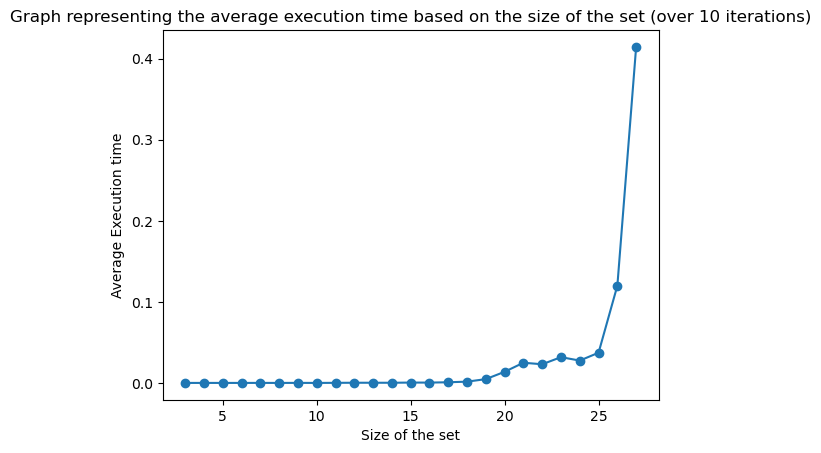

In [36]:
import matplotlib.pyplot as plt
import time
import numpy as np

def generate_graph_calculate_time_subset(num, num_trials=10):
    list_avg_time = []
    for size in range(3, num):
        avg_time = 0
        for _ in range(num_trials):
            _set = [np.random.randint(1, 70) for _ in range(size)]
            target_sum = np.random.randint(1, size * 10) 
            subset = []

            start_time = time.time()
            print_subset_sum(0, size, _set, target_sum, subset)
            end_time = time.time()

            total_time = end_time - start_time
            avg_time += total_time / num_trials

        list_avg_time.append(avg_time)

    return list_avg_time

def print_subset_sum(i, n, _set, target_sum, subset):
    global flag
    if target_sum == 0:
        flag = True
        return

    if i == n:
        return

    print_subset_sum(i + 1, n, _set, target_sum, subset)

    if _set[i] <= target_sum:
        subset.append(_set[i])
        print_subset_sum(i + 1, n, _set, target_sum - _set[i], subset)
        subset.pop()

if __name__ == "__main__":
    num = 28
    num_iterations = 10
    time_list_subset = generate_graph_calculate_time_subset(num, num_iterations)
    matrix_sizes_subset = range(3, num)
    
    plt.plot(matrix_sizes_subset, time_list_subset, marker='o')
    plt.title("Graph representing the average execution time based on the size of the set (over 10 iterations)")
    plt.xlabel('Size of the set')
    plt.ylabel('Average Execution time')
    plt.show()
